In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

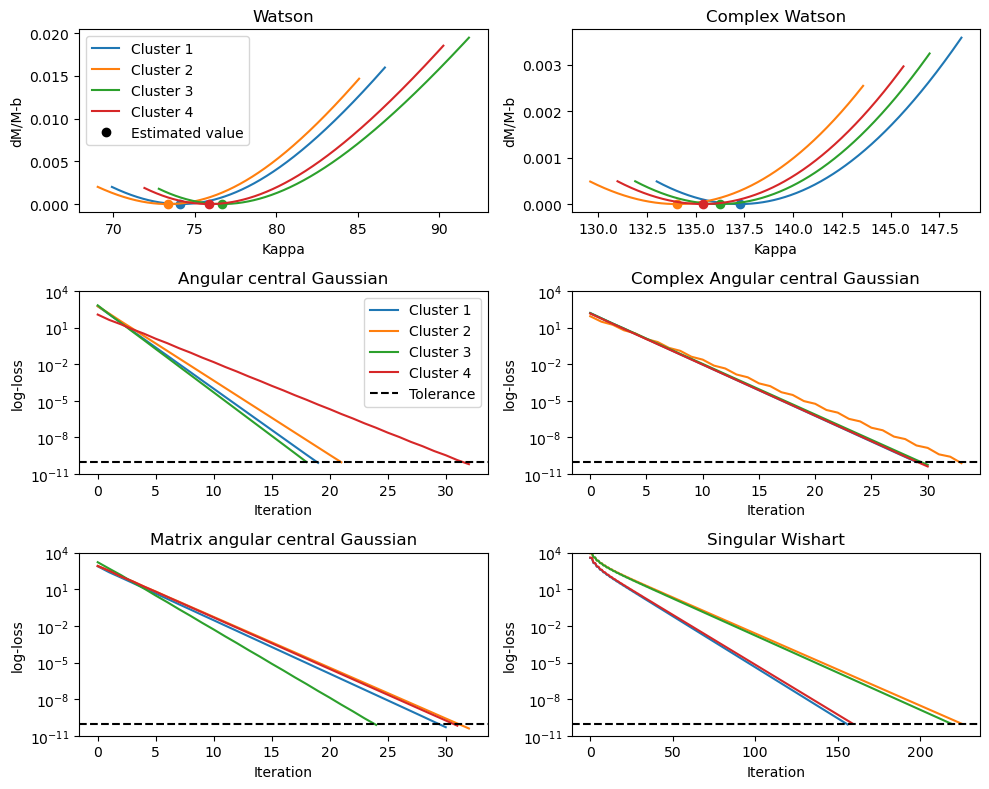

In [ ]:
#2x3 subplot
palette = sns.color_palette("tab10")
modelnames5 = ['Watson','Complex_Watson','ACG','Complex_ACG','MACG','SingularWishart']
fig, ax = plt.subplots(3,2,figsize=(10,8))
for i,modelname in enumerate(modelnames5):
    lines = []
    for k in range(4):
        if 'Watson' in modelname:
            kappas = np.loadtxt('loss_curves/'+modelname+'_kappas'+str(k+1)+'.txt')
            fs = np.loadtxt('loss_curves/'+modelname+'_fs'+str(k+1)+'.txt')
            l = ax[i//2,i%2].plot(kappas,fs,label='Cluster '+str(k+1),color=palette[k])
            lines.append(l)
            minfs = np.min(fs)
            minfs_kappa = kappas[np.argmin(fs)]
            p = ax[i//2,i%2].plot(minfs_kappa,minfs,'o',label='Estimated value',color=palette[k])
            lines.append(p)
        else:
            loss = np.loadtxt('loss_curves/'+modelname+'_loss'+str(k+1)+'.txt')
            ax[i//2,i%2].plot(loss,color=palette[k])
            #plot dashes horizontal line at 1e-10
    if 'Watson' in modelname:
        ax[i//2,i%2].set_ylabel('dM/M-b')
        ax[i//2,i%2].set_xlabel('Kappa')
    else:
        ax[i//2,i%2].axhline(y=1e-10, color='k', linestyle='--')
        ax[i//2,i%2].set_ylabel('log-loss')
        ax[i//2,i%2].set_xlabel('Iteration')
        ax[i//2,i%2].set_yscale('log')
        ax[i//2,i%2].set_ylim([1e-11,1e4])
    if i==0:
        # ax[i//2,i%2].legend(handles=[lines[0][0],lines[2][0],lines[4][0],lines[6][0],lines[7][0]],labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Estimated value'])
        ax[i//2,i%2].legend(handles=[lines[0][0],lines[2][0],lines[4][0],lines[6][0],plt.plot([],'ko')[0]],labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Estimated value'])
        ax[i//2,i%2].set_title('Watson')
    elif i==2:
        ax[i//2,i%2].legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Tolerance'])
        ax[i//2,i%2].set_title('Angular central Gaussian')
    elif i==4:
        ax[i//2,i%2].set_title('Matrix angular central Gaussian')
    elif i==1:
        ax[i//2,i%2].set_title('Complex Watson')
    elif i==3:
        ax[i//2,i%2].set_title('Complex Angular central Gaussian')
    elif i==5:
        ax[i//2,i%2].set_title('Singular Wishart')
    
plt.tight_layout()
plt.savefig('figures/loss_curves.png')
    